In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Dsata Set for Assignment 1.xlsx")
df = df.dropna()
df['diagnosis'] = df['diagnosis'].replace({"B": 0, "M": 1})

df_train = df.sample(frac=0.66, random_state=2326)
df_test = df.drop(df_train.index)
X_train = df_train.loc[:, "radius_mean":].values
y_train = df_train.loc[:, "diagnosis":"diagnosis"].values
X_test = df_test.loc[:, "radius_mean":].values
y_test = df_test.loc[:, "diagnosis":"diagnosis"].values


def costfunction(tn, yn):
    errors = -tn * np.log(yn) - (1 - tn) * np.log(1 - yn)
    return (errors)

def initialize_weights(dim):
    w = np.ones(dim)
    return w

def sigmoid(z):
    return (1/(1+np.exp(-z)))


def gradient(tn, yn, Xn):
    dE = (yn-tn)*Xn
    return dE


def logregminibatch(w, alpha):
    Error = initialize_weights(X_train.shape[1])
    temp = 0
    for i in range(X_train.shape[0]):
        z = sigmoid(np.dot(w.T, X_train[i]))
        y_i = y_train[i]
        Error = Error + gradient(y_i, z, X_train[i])
        cost = costfunction(y_i, z)
        cost_history.append(cost)

        temp += 1
        if(temp == 5):
            w = w - alpha * Error
            temp = 0

    return w 

cost_history = []
w = initialize_weights(X_train.shape[1])
alpha = 0.1
epochs = 2000
for epoch in range(epochs):
    w= logregminibatch(w, alpha)


def costfunction(tn, yn):
    errors = -tn * np.log(yn) - (1 - tn) * np.log(1 - yn)
    return np.mean(errors)

def checkAccuracy():
    count = 0
    for i in range(X_test.shape[0]):
        k = sigmoid(np.dot(w.T, X_test[i]))
        if k >= 0.5:
            y_test_i = 1
        else:
            y_test_i = 0

        if(y_test[i] == y_test_i):
            count += 1

    accuracy = count * 100
    accuracy = accuracy/X_test.shape[0]
    return accuracy

def checkprecision():
    true_positives = 0
    total_positives = 0
    for i in range(X_test.shape[0]):
        k = sigmoid(np.dot(w.T, X_test[i]))
        if k >= 0.5:
            total_positives += 1
            if(y_test[i] == 1):
                true_positives += 1
    precision = true_positives/total_positives
    return precision*100

def checkrecall():
    true_positives = 0
    false_negatives = 0
    for i in range(X_test.shape[0]):
        k = sigmoid(np.dot(w.T, X_test[i]))
        if k >= 0.5:
            if(y_test[i] == 1):
                true_positives += 1
        else:
            if(y_test[i]==1):
                false_negatives += 1
                    
    recall = true_positives/(true_positives+false_negatives)
    return recall*100
    
    

accuracy = checkAccuracy()
precision = checkprecision()
recall = checkrecall()

print(accuracy)
print(precision)
print(recall)


C:\Users\nikhi\AppData\Local\Temp/ipykernel_73908/1652886436.py:14: RuntimeWarning: divide by zero encountered in log
  errors = -tn * np.log(yn) - (1 - tn) * np.log(1 - yn)
C:\Users\nikhi\AppData\Local\Temp/ipykernel_73908/1652886436.py:23: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))
C:\Users\nikhi\AppData\Local\Temp/ipykernel_73908/1652886436.py:14: RuntimeWarning: invalid value encountered in multiply
  errors = -tn * np.log(yn) - (1 - tn) * np.log(1 - yn)


91.62303664921465
84.0
94.02985074626866


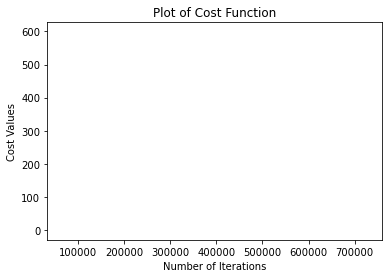

In [3]:
plt.plot(cost_history)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost Values')
plt.title('Plot of Cost Function')

plt.show()
